In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv=datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
oliv.data.shape

(400, 4096)

In [5]:
oliv.images.shape

(400, 64, 64)

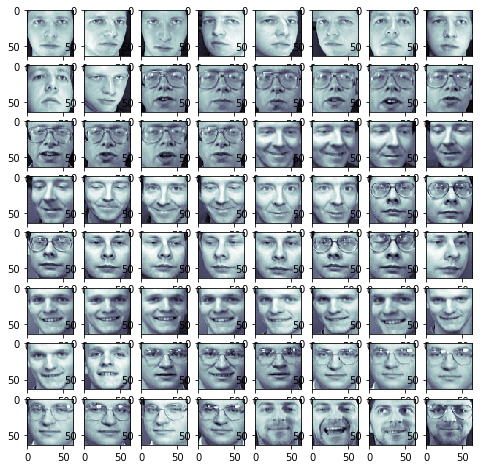

In [6]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv['images'][i],cmap=plt.cm.bone)
plt.show()

In [7]:
x=oliv.data
y=oliv.target

In [8]:
pca=PCA()
transformed_data=pca.fit_transform(x)


In [9]:
pca.components_

array([[-0.00419106, -0.00710951, -0.00933621, ...,  0.00018518,
         0.00337968,  0.00318827],
       [-0.02859129, -0.03328853, -0.03784647, ...,  0.0296278 ,
         0.02721295,  0.02488895],
       [ 0.00135695, -0.00032566, -0.00019787, ..., -0.01541373,
        -0.01370986, -0.01188348],
       ...,
       [ 0.00223458,  0.02056681,  0.01515902, ..., -0.01273586,
        -0.0584899 , -0.0765035 ],
       [ 0.01714722,  0.02917713, -0.00942509, ...,  0.00159098,
         0.01249368, -0.00815242],
       [ 0.00122431,  0.01279919,  0.01620304, ..., -0.01186853,
        -0.01660282, -0.00559816]], dtype=float32)

In [10]:
total=sum(pca.explained_variance_)
current=0
k=0
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

260

In [11]:
pca=PCA(n_components=k,whiten=True)
transform_data=pca.fit_transform(x)


In [12]:
transform_data.shape

(400, 260)

In [13]:
x_transform=pca.inverse_transform(transform_data)
x_transform.shape

(400, 4096)

In [14]:
x_approx_image=x_transform.reshape((400,64,64))

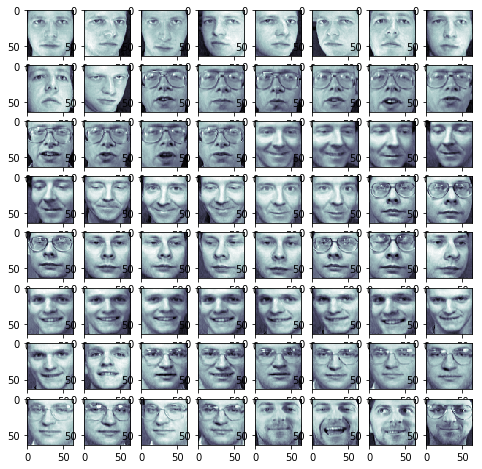

In [15]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_image[i],cmap=plt.cm.bone)
plt.show()

In [18]:
eigen_vect=pca.components_
eigen_vect.shape

(260, 4096)

In [19]:
eigenface=eigen_vect.reshape((260,64,64))


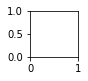

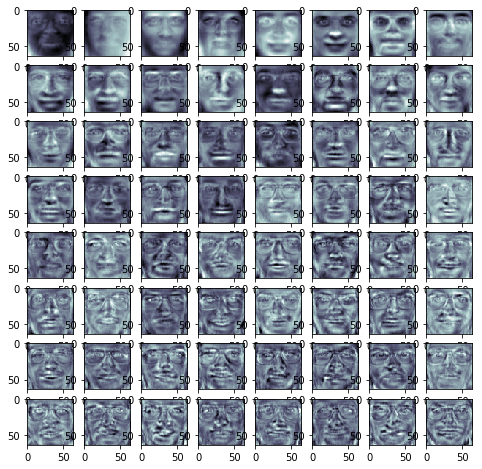

In [21]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenface[i],cmap=plt.cm.bone)
plt.show()